# Titanic: Machine Learning from Disaster

### Predict the survival rate of passengers

### Data Dictionary :


- **Survival :	0 = No, 1 = Yes**

- **pclass (Ticket class) :	1 = 1st, 2 = 2nd, 3 = 3rd**

-  **sex : Sex**

- **Age :	Age in years**	

-  **sibsp	: # of siblings / spouses aboard the Titanic**

- **parch : 	# of parents / children aboard the Titanic**	

- **ticket : 	Ticket number**	

- **fare :	Passenger fare**

- **cabin :	Cabin number**	

- **embarked : 	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton**

### 1 Importing libraries and dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# importing dataset

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### 2 EDA

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


- **Sex and Cabin seem to have lots of missing values**

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- **We can see that nearly 38 % of the people in train dataset survived**

In [6]:
# Checking for missing values

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Checking out percentage of missing data

total = train_df.isnull().sum().sort_values(ascending = False)

percent_1 = train_df.isnull().sum() / train_df.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending = False)

missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])

missing_data.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [10]:
train_df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

### 3 Univariate and Bivariate Analysis

#### 3.1 Relation of survival rate between Age and Sex

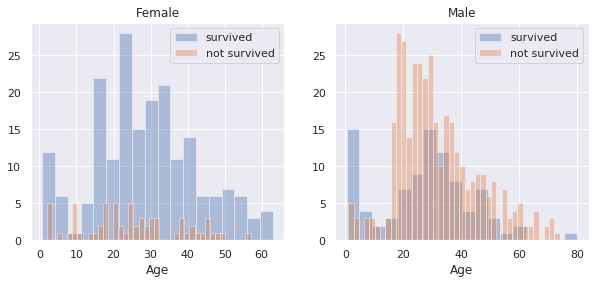

In [11]:
survived = 'survived'
not_survived = 'not survived'

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins = 18, 
                  label = survived, ax = axes[0], kde = False)

ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, 
                  label = not_survived, ax = axes[0], kde = False)

ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins = 18, 
                  label = survived, ax = axes[1], kde = False)

ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins = 40, 
                  label = not_survived, ax = axes[1], kde = False)

ax.legend()
ax.set_title('Male');

- **We can see that men have a higher probability of survival when ther are between 18 to 30 years old**
- **For women, they have  a higher overall survival rate with mainly ages between 13 to 40** 

#### 3.2 Relation of survival rate between Embarked, Pclass and Sex

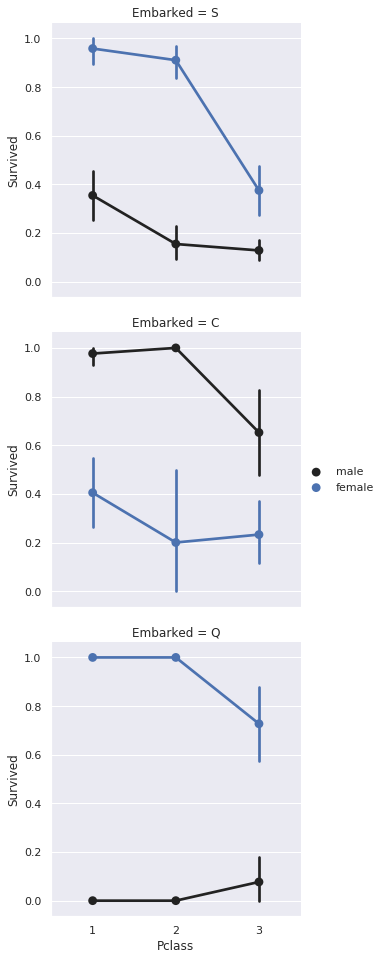

In [12]:
Facetgrid = sns.FacetGrid(train_df, row = 'Embarked', height = 4.5)
Facetgrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = None, hue_order = None)
Facetgrid.add_legend();


- **Women who boarded from Port Q and Port S have a higher survival rate**
- **Men who boarded from Port C seem to have higher survival rates**
- **Embarked seems to be correlated with Survival depending on gender**

#### 3.3 Relation between Pclass and Survival

Percentage of Pclass=1 who survived is 62.96296296296296
Percentage of Pclass=2 who survived is 47.28260869565217
Percentage of Pclass=3 who survived is 24.236252545824847


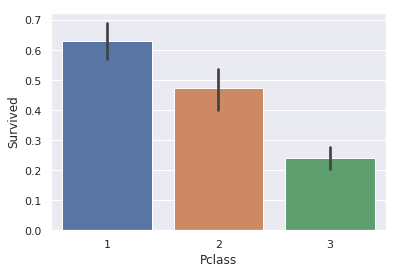

In [13]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df);

print('Percentage of Pclass=1 who survived is',train_df['Survived'][train_df['Pclass']== 1].value_counts(normalize=True)[1]*100) 
print('Percentage of Pclass=2 who survived is',train_df['Survived'][train_df['Pclass']== 2].value_counts(normalize=True)[1]*100) 
print('Percentage of Pclass=3 who survived is',train_df['Survived'][train_df['Pclass']== 3].value_counts(normalize=True)[1]*100)

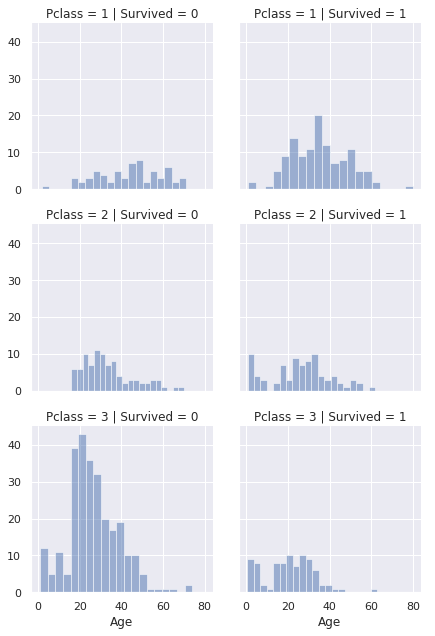

In [14]:
grid = sns.FacetGrid(data = train_df, row = 'Pclass', col = 'Survived')
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend();

- **Pclass 1 seems to contribute greately to survival rate**

#### 3.4 SibSp and Parch and Survival rates

- SibSp = no of siblings/spouses aboard
- Parch = no. of parents/children aboard

In [0]:
# We are combining Sibsp and Parch that shows total no of relatives on board

data = [train_df, test_df]

for data_new in data:
    data_new['relatives'] = data_new['SibSp'] + data_new['Parch']


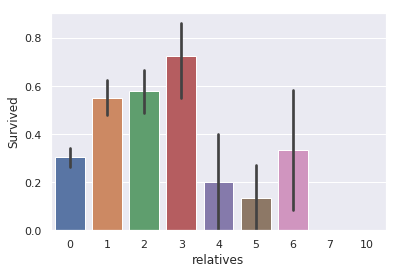

In [16]:
sns.barplot(data = train_df, x = 'relatives', y = 'Survived');

**People with higher no of relatives tend to have higher survival rates**

#### 3.5 Male Female Survivate rate

Percentage of female who survived is 74.20382165605095
Percentage of male who survived is 18.890814558058924


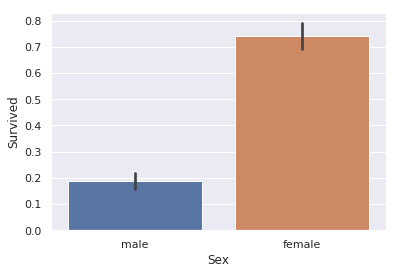

In [17]:
sns.barplot(data = train_df, x = 'Sex', y = 'Survived');

print('Percentage of female who survived is',train_df['Survived'][train_df['Sex']=='female'].value_counts(normalize=True)[1]*100) 
print('Percentage of male who survived is',train_df['Survived'][train_df['Sex']=='male'].value_counts(normalize=True)[1]*100) 

**Thus we can see that perentage of women who survived is much higher**

### 4 Feature Modelling

In [18]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


#### 4.1 Converting the Age column from a continious variable to a categorical variable

**In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the pandas.cut() function to help us out.**

- **The pandas.cut() function has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.**

**Age column has 177 missing values**
- **we will fill all the missing age values with values -0.5 to make it easier for us to put it into a category later on**

**Create the cut_points and label_names lists to split the Age column into six categories:**

- **Missing:  from -1 to 0**
- **Infant  : from 0 to 5**
- **Child : from 5 to 12**
- **Teenager : from 12 to 18**
- **Young Adult : from 18 to 35**
- **Adult : from 35 to 60**
- **Senior : from 60 to 100**

In [0]:
def process_age(df, cut_points, label_names):
    df['Age'] = df['Age'].fillna(-0.5)     # Filling missing values with -0.5
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels = label_names )
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

In [0]:
# Alternate Method

#train['Age']=train['Age'].fillna(-0.5)
#test['Age']=test['Age'].fillna(-0.5)
#bins=[-1,0,5,12,17,25,35,60,np.inf]
#labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior Citizen']
#train['Agegroup']=pd.cut(train['Age'],bins,labels=labels)
#test['Agegroup']=pd.cut(train['Age'],bins,labels=labels)

#sns.barplot(x='Agegroup',y='Survived',data=train)

In [0]:
train_df = process_age(train_df, cut_points, label_names)
test_df = process_age(test_df, cut_points, label_names)

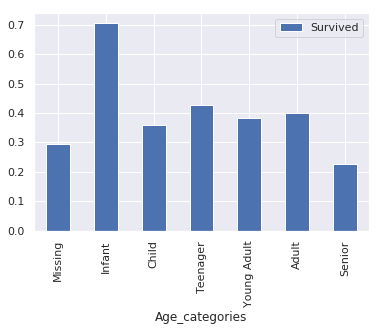

In [22]:
# We see the distribution of survival rates by Age_categories using a pivot table to 
# pivot the train_df dataset by the Age_categories column

age_cat_pivot = train_df.pivot_table(values = 'Survived', index = 'Age_categories')
age_cat_pivot.plot.bar();

#### 4.2 OHE hot encoding the categorical variables

**Categorical variables**
- **Pclass, Sex, Age_categories**

In [0]:
# ohe the Pclass with pd.get_dummies method
# ohe has to be done on both train and test set

train_df = pd.get_dummies(data = train_df, columns= ['Pclass'], drop_first = True)
test_df = pd.get_dummies(data = test_df, columns = ['Pclass'], drop_first = True)

In [0]:
# Function for get_dummies method

def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name, drop_first = True)
    df = pd.concat([df, dummies], axis = 1)
    return df
    

In [0]:
# OHE the Sex class

train_df = create_dummies(train_df, 'Sex')
test_df = create_dummies(test_df, 'Sex')


In [0]:
# OHE the Age_Categories column

train_df = create_dummies(train_df, 'Age_categories')
test_df = create_dummies(test_df, 'Age_categories')

In [27]:
test_df.head(2)

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,Age_categories,Pclass_2,Pclass_3,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Young Adult,0,1,1,0,0,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Adult,0,1,0,0,0,0,0,1,0


In [0]:
# Dropping the Age_categories column

train_df = train_df.drop(columns = ['Age_categories'], axis = 1)
test_df = test_df.drop(columns = ['Age_categories'], axis = 1)


#### 4.3 Dealing with missing values (embarked col)

In [29]:
train_df.isnull().sum()

PassengerId                     0
Survived                        0
Name                            0
Sex                             0
Age                             0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            0
Cabin                         687
Embarked                        2
relatives                       0
Pclass_2                        0
Pclass_3                        0
Sex_male                        0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

In [30]:
# Dealing with the missing rows in embarked column

print('No. of people embarked from S :',train_df[train_df['Embarked']=='S'].shape[0])
print('No. of people embarked from C :',train_df[train_df['Embarked']=='C'].shape[0])
print('No. of people embarked from Q :',train_df[train_df['Embarked']=='Q'].shape[0])

No. of people embarked from S : 644
No. of people embarked from C : 168
No. of people embarked from Q : 77


**Since maximum people embarked from port S, we will be filling the missing Embarked values with S**

In [31]:
train_df['Embarked']=train_df['Embarked'].fillna('S')
train_df.isnull().sum()

PassengerId                     0
Survived                        0
Name                            0
Sex                             0
Age                             0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            0
Cabin                         687
Embarked                        0
relatives                       0
Pclass_2                        0
Pclass_3                        0
Sex_male                        0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

In [32]:
test_df.isnull().sum()

PassengerId                     0
Name                            0
Sex                             0
Age                             0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            1
Cabin                         327
Embarked                        0
relatives                       0
Pclass_2                        0
Pclass_3                        0
Sex_male                        0
Age_categories_Infant           0
Age_categories_Child            0
Age_categories_Teenager         0
Age_categories_Young Adult      0
Age_categories_Adult            0
Age_categories_Senior           0
dtype: int64

**We will be dropping the cabin column from the train and test dataset**

#### 4.4 OHE the embarked column

In [0]:
train_df = create_dummies(train_df, 'Embarked')
test_df = create_dummies(test_df, 'Embarked')

### 5 Data Preprocessing

In [34]:
train_df.columns

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [0]:
columns = ['Age','relatives', 'Pclass_2','Pclass_3', 
           'Sex_male', 'Age_categories_Infant', 'Age_categories_Child',
           'Age_categories_Teenager', 'Age_categories_Young Adult',
           'Age_categories_Adult', 'Age_categories_Senior', 'Embarked_Q','Embarked_S']

X = train_df[columns]
y = train_df['Survived']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [0]:
# Standardizing the data

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) 

### 6 Spot Checking Algorithms

LR: 0.814671 (0.021897)
KNN: 0.757101 (0.035581)
CART: 0.788146 (0.047168)
NB: 0.783764 (0.031800)
SVM: 0.796479 (0.034799)
SGD: 0.687070 (0.101525)
RF: 0.785290 (0.041063)
LinearSVC: 0.775235 (0.066198)


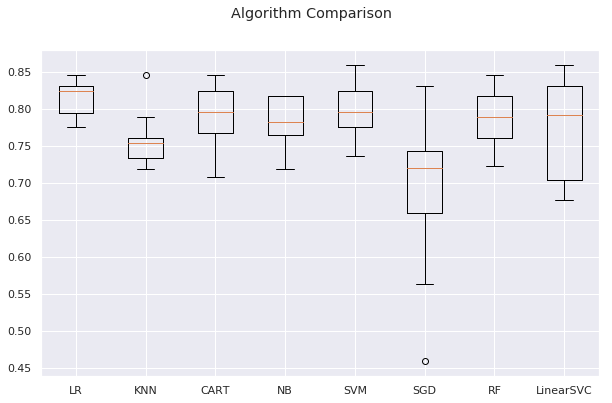

In [41]:
# Spot checking algorithms

models = []
models.append(('LR' , LogisticRegression(solver = 'liblinear' , multi_class = 'auto')))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' ,GaussianNB()))
models.append(('SVM' , SVC(gamma = 'auto')))
models.append(('SGD', SGDClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LinearSVC', LinearSVC()))



# Evaluating models on each turn

results = []
names = []

for name,model in models :
    kfold = KFold(n_splits = 10 , random_state=7)
    cv_results = cross_val_score(model , X_train, y_train , cv = kfold , scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean() , cv_results.std())
    print(msg)
    
# Creating a plot of the model evaluation results to compare the spread and mean accuracy of each model

fig =plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**We can see that Logistic Regression seems to provide the best results**

### 7 HyperParameter tuning for Logistic Regression

In [47]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5] 
param_grid = dict(dual= dual, max_iter= max_iter, C= C )

model = LogisticRegression()
kfold = KFold(n_splits = 10 , random_state= 7)
grid =GridSearchCV(estimator = model , param_grid = param_grid , scoring= 'accuracy' ,cv = kfold)
grid_result = grid.fit(X_train , y_train)


print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.818820 using {'C': 1.5, 'dual': False, 'max_iter': 100}
0.772472 (0.090162) with {'C': 1.0, 'dual': True, 'max_iter': 100}
0.797753 (0.064816) with {'C': 1.0, 'dual': True, 'max_iter': 110}
0.780899 (0.056190) with {'C': 1.0, 'dual': True, 'max_iter': 120}
0.796348 (0.054137) with {'C': 1.0, 'dual': True, 'max_iter': 130}
0.797753 (0.064689) with {'C': 1.0, 'dual': True, 'max_iter': 140}
0.814607 (0.021900) with {'C': 1.0, 'dual': False, 'max_iter': 100}
0.814607 (0.021900) with {'C': 1.0, 'dual': False, 'max_iter': 110}
0.814607 (0.021900) with {'C': 1.0, 'dual': False, 'max_iter': 120}
0.814607 (0.021900) with {'C': 1.0, 'dual': False, 'max_iter': 130}
0.814607 (0.021900) with {'C': 1.0, 'dual': False, 'max_iter': 140}
0.794944 (0.062289) with {'C': 1.5, 'dual': True, 'max_iter': 100}
0.776685 (0.104237) with {'C': 1.5, 'dual': True, 'max_iter': 110}
0.804775 (0.033306) with {'C': 1.5, 'dual': True, 'max_iter': 120}
0.741573 (0.073787) with {'C': 1.5, 'dual': True, 'max_iter

**We can see that the best accuracy of 82% is achieved with  C = 1.5 , dual = False and max_iter = 100** 

### 8 Finalizing the model

In [50]:
model_LR = LogisticRegression(C= 1.5, dual= False, max_iter= 100 )
model_LR.fit(X_train , y_train)
y_pred = model_LR.predict(X_test)


print('accuracy_score:', accuracy_score(y_test , y_pred))
print('-'*50)
print('Confusion matrix' )
print(confusion_matrix(y_test ,y_pred))
print('-'*50)
print('Classification report :')
print(classification_report(y_test,y_pred))

accuracy_score: 0.8212290502793296
--------------------------------------------------
Confusion matrix
[[96 14]
 [18 51]]
--------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**We can see that our model has an accuracy of 82%**